### H5に Feature Select で列を絞ったdataを保存する

In [1]:
import gc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pandas_profiling as pp


warnings.filterwarnings('ignore')
%matplotlib inline


pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

print(os.curdir)
print(os.listdir("input"))


.
['sample_submission.csv']


In [2]:
gc.collect()

51

In [3]:
### 711_feature-select_lgbm から上位何件か列を選択する
path = f'./output/feature-select/importance-lgbm.csv'
imp_lgbm = pd.read_csv(path, index_col=0)
display(imp_lgbm[:1000])


,index,importance
0,P_2_max,178353.829619
1,D_48_avg,87761.168484
2,P_2_last,72133.812329
3,D_44_last,64493.924031
4,B_3_last,55413.463644
...,...,...
995,B_42_ldiff,0.000000
996,B_38_last_4,0.000000
997,D_87_max,0.000000
998,D_68_last_0,0.000000


<AxesSubplot:>

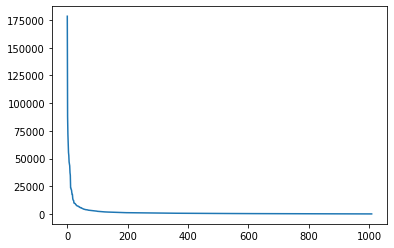

In [4]:
imp_lgbm['importance'].plot()

In [5]:
num = 300 # グラフを見て決める
cols_lgbm = imp_lgbm[:num]['index'].to_list()
cols_lgbm

['P_2_max',
 'D_48_avg',
 'P_2_last',
 'D_44_last',
 'B_3_last',
 'B_9_last',
 'B_18_last',
 'B_2_last',
 'B_9_max',
 'D_48_last',
 'B_3_avg',
 'D_44_avg',
 'D_44_max',
 'D_39_last',
 'B_11_last',
 'R_1_avg',
 'R_1_max',
 'R_1_last',
 'D_42_max',
 'D_41_last',
 'B_23_last',
 'S_3_last',
 'S_3_avg',
 'D_61_avg',
 'P_2_avg',
 'D_58_last',
 'P_3_min',
 'P_2_min',
 'D_42_last',
 'D_78_avg',
 'R_1_ldiff',
 'B_8_min',
 'S_7_avg',
 'B_20_last',
 'D_44_ldiff',
 'D_42_min',
 'D_43_avg',
 'B_4_ldiff',
 'B_7_last',
 'B_1_last',
 'R_6_max',
 'D_45_max',
 'S_23_avg',
 'D_50_max',
 'B_37_ldiff',
 'D_43_last',
 'P_3_last',
 'D_112_last',
 'D_65_last',
 'B_10_last',
 'B_6_last',
 'R_2_last',
 'D_61_last',
 'B_5_last',
 'B_2_avg',
 'R_5_last',
 'D_54_last',
 'P_3_avg',
 'D_42_avg',
 'D_47_last',
 'R_5_avg',
 'S_15_avg',
 'B_1_avg',
 'S_7_last',
 'D_50_avg',
 'B_2_min',
 'R_2_ldiff',
 'B_11_min',
 'R_3_min',
 'D_46_last',
 'D_50_last',
 'S_23_ldiff',
 'B_23_ldiff',
 'B_17_last',
 'B_17_avg',
 'B_22_ldif

In [6]:
### 710_feature-select_rf から上位何件か列を選択する
path = f'./output/feature-select/importance-rf.csv'
imp_rf = pd.read_csv(path, index_col=0)
display(imp_rf[:1000])


,index,importance
0,P_2_last,0.028256
1,P_2_avg,0.023627
2,P_2_min,0.022785
3,B_9_last,0.021763
4,D_48_last,0.018683
...,...,...
995,D_64_cnt_null,0.000000
996,D_64_last_m1,0.000000
997,D_126_cnt_null,0.000000
998,B_38_cnt_0,0.000000


<AxesSubplot:>

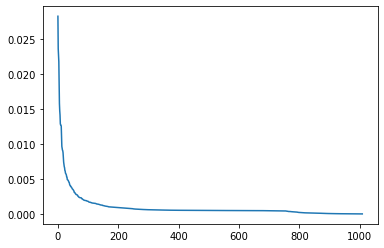

In [7]:
imp_rf['importance'].plot()

In [8]:
num = 300 # グラフを見て決める
cols_rf = imp_rf[:num]['index'].to_list()
cols_rf

['P_2_last',
 'P_2_avg',
 'P_2_min',
 'B_9_last',
 'D_48_last',
 'P_2_max',
 'D_44_last',
 'B_2_last',
 'B_9_max',
 'B_18_last',
 'R_1_avg',
 'R_1_max',
 'B_37_last',
 'B_11_last',
 'B_1_last',
 'D_44_avg',
 'D_44_max',
 'B_3_last',
 'R_1_last',
 'B_9_avg',
 'B_33_last',
 'B_2_avg',
 'D_48_avg',
 'D_61_last',
 'D_75_last',
 'D_48_max',
 'B_3_max',
 'B_20_last',
 'R_10_max',
 'B_23_last',
 'B_3_avg',
 'B_7_last',
 'D_42_min',
 'S_25_min',
 'B_19_last',
 'B_3_ldiff',
 'D_55_last',
 'D_42_max',
 'D_42_avg',
 'R_1_ldiff',
 'D_44_ldiff',
 'B_18_min',
 'B_2_min',
 'R_2_ldiff',
 'R_10_avg',
 'B_37_avg',
 'R_2_last',
 'B_6_last',
 'B_18_avg',
 'D_48_min',
 'B_23_avg',
 'B_22_max',
 'B_10_last',
 'B_11_avg',
 'P_2_ldiff',
 'B_22_avg',
 'D_78_max',
 'S_23_last',
 'R_2_avg',
 'B_4_last',
 'D_39_last',
 'D_41_ldiff',
 'B_4_ldiff',
 'S_3_avg',
 'D_41_last',
 'B_1_avg',
 'D_75_max',
 'R_3_avg',
 'B_19_avg',
 'B_30_last_0',
 'B_6_min',
 'S_3_max',
 'B_7_avg',
 'P_3_last',
 'R_2_max',
 'S_3_last',
 'S

In [9]:
### 712_feature-select_xboost から上位何件か列を選択する
path = f'./output/feature-select/importance-xboost.csv'
imp_xboost = pd.read_csv(path, index_col=0)
display(imp_xboost[:1000])


,index,importance
0,P_2_last,0.087181
1,D_48_last,0.059328
2,B_9_last,0.051514
3,B_2_last,0.041016
4,B_1_last,0.038397
...,...,...
995,D_52_last,0.000000
996,D_68_cnt_5,0.000000
997,B_16_avg,0.000000
998,D_50_ldiff,0.000000


<AxesSubplot:>

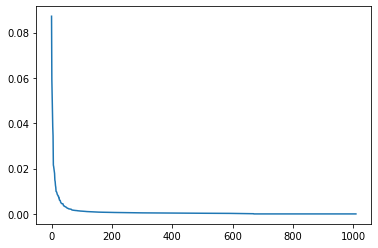

In [10]:
 imp_xboost['importance'].plot()

In [11]:
num = 150 # グラフを見て決める
cols_xboost = imp_xboost[:num]['index'].to_list()
cols_xboost

['P_2_last',
 'D_48_last',
 'B_9_last',
 'B_2_last',
 'B_1_last',
 'D_44_last',
 'R_1_avg',
 'D_44_max',
 'B_7_last',
 'D_51_last',
 'R_1_last',
 'R_2_last',
 'B_7_avg',
 'D_44_avg',
 'D_42_avg',
 'B_3_ldiff',
 'S_23_last',
 'B_11_last',
 'D_62_avg',
 'D_50_avg',
 'D_41_last',
 'D_51_avg',
 'S_3_avg',
 'B_4_ldiff',
 'R_3_avg',
 'D_41_ldiff',
 'S_3_last',
 'B_3_last',
 'R_27_min',
 'D_42_max',
 'D_56_last',
 'P_3_avg',
 'D_42_min',
 'D_43_avg',
 'D_45_avg',
 'R_1_max',
 'B_30_cnt_0',
 'D_39_last',
 'D_45_max',
 'B_4_last',
 'D_112_last',
 'D_44_ldiff',
 'S_15_avg',
 'D_43_last',
 'S_23_max',
 'D_49_last',
 'D_50_last',
 'B_3_max',
 'D_79_last',
 'B_2_avg',
 'S_25_min',
 'D_65_avg',
 'D_56_max',
 'D_64_cnt_O',
 'D_51_min',
 'D_66_cnt_1',
 'R_3_last',
 'D_128_max',
 'R_27_last',
 'R_4_ldiff',
 'D_64_last_O',
 'D_39_max',
 'D_111_min',
 'B_18_min',
 'R_4_last',
 'B_4_max',
 'B_18_avg',
 'D_59_max',
 'D_42_last',
 'B_21_max',
 'B_10_last',
 'D_48_ldiff',
 'B_23_max',
 'S_26_max',
 'S_26_avg

In [12]:
### 全体のデータを保存
# 列の重複を排除
cols_all = cols_lgbm + cols_rf + cols_xboost 
cols_all=list(set(cols_all))
print('cols_lgbm: ', len(cols_lgbm))
print('cols_rf: ', len(cols_rf))
print('cols_xboost: ', len(cols_xboost))
print('cols_all: ', len(cols_all))
cols_all

cols_lgbm:  300
cols_rf:  300
cols_xboost:  150
cols_all:  423


['S_25_min',
 'B_1_ldiff',
 'D_55_avg',
 'D_84_avg',
 'B_21_max',
 'S_11_avg',
 'D_79_avg',
 'D_42_avg',
 'D_129_min',
 'D_41_max',
 'D_51_min',
 'B_20_avg',
 'R_1_max',
 'D_58_last',
 'R_10_ldiff',
 'P_3_min',
 'S_3_last',
 'D_49_min',
 'R_27_max',
 'B_8_avg',
 'R_14_avg',
 'B_13_max',
 'S_15_last',
 'B_17_min',
 'D_76_last',
 'B_2_last',
 'D_63_cnt_CO',
 'D_74_last',
 'D_124_max',
 'B_39_avg',
 'R_5_avg',
 'D_51_avg',
 'D_48_min',
 'D_56_last',
 'D_84_max',
 'D_52_min',
 'R_26_min',
 'B_11_last',
 'D_64_cnt_O',
 'D_77_last',
 'B_7_avg',
 'D_141_max',
 'D_39_avg',
 'B_40_avg',
 'B_2_avg',
 'R_7_last',
 'D_64_last_O',
 'D_66_last_null',
 'D_84_ldiff',
 'B_29_last',
 'S_13_last',
 'D_65_max',
 'D_106_avg',
 'D_50_avg',
 'R_7_ldiff',
 'S_26_avg',
 'D_49_max',
 'B_16_avg',
 'D_60_last',
 'R_11_ldiff',
 'D_45_last',
 'S_7_max',
 'S_9_min',
 'D_61_max',
 'S_22_max',
 'B_6_min',
 'B_7_ldiff',
 'D_78_avg',
 'D_46_avg',
 'D_70_last',
 'B_9_max',
 'R_22_ldiff',
 'D_39_max',
 'D_41_ldiff',
 'D_5

In [ ]:
%%time
# 前処理済みデータの読み込み
h5File = "temp_data/h5/prepared_data_with_last.h5";
key_train = 'prepared_01/train';
key_valid = 'prepared_01/valid';
key_test = 'prepared_01/test';

train = pd.read_hdf(h5File, key_train); gc.collect();
valid = pd.read_hdf(h5File, key_valid); gc.collect();
test = pd.read_hdf(h5File, key_test); gc.collect();


In [ ]:
%%time
data = pd.concat([train, valid], axis=1, join='inner')
data = pd.concat([data, test], sort=False)
data

In [ ]:
data_all = data[cols_all]
train = data_all[:len(train)]
test = data_all[len(train):]
data_all

In [ ]:
%%time
h5File = "temp_data/h5/feature_select_data_with_last.h5";
key_train = 'feature_select_01/train';
key_valid = 'feature_select_01/valid';
key_test = 'feature_select_01/test';

train.to_hdf(h5File, key_train); gc.collect();
valid.to_hdf(h5File, key_valid); gc.collect();
test.to_hdf(h5File, key_test); gc.collect();



In [ ]:
gc.collect()

In [ ]:
%%time
h5File = "temp_data/h5/feature_select_data_with_last.h5";
key_train = 'feature_select_01/train';
key_valid = 'feature_select_01/valid';
key_test = 'feature_select_01/test';

train = pd.read_hdf(h5File, key_train); gc.collect();
valid = pd.read_hdf(h5File, key_valid); gc.collect();
test = pd.read_hdf(h5File, key_test); gc.collect();


In [ ]:
train

In [ ]:
test

In [ ]:
valid

In [ ]:
gc.collect()